In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
from traced.models import NormalModel

In [3]:
import numpy as np

In [4]:
data = np.random.normal(2, 2, 100)

In [5]:
model_a = NormalModel("a", "b")
model_b = NormalModel("a", "b", gamma=0.5)
model_c = NormalModel("a", "b", gamma=0.3)

In [6]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

In [7]:
import matplotlib.pyplot as plt

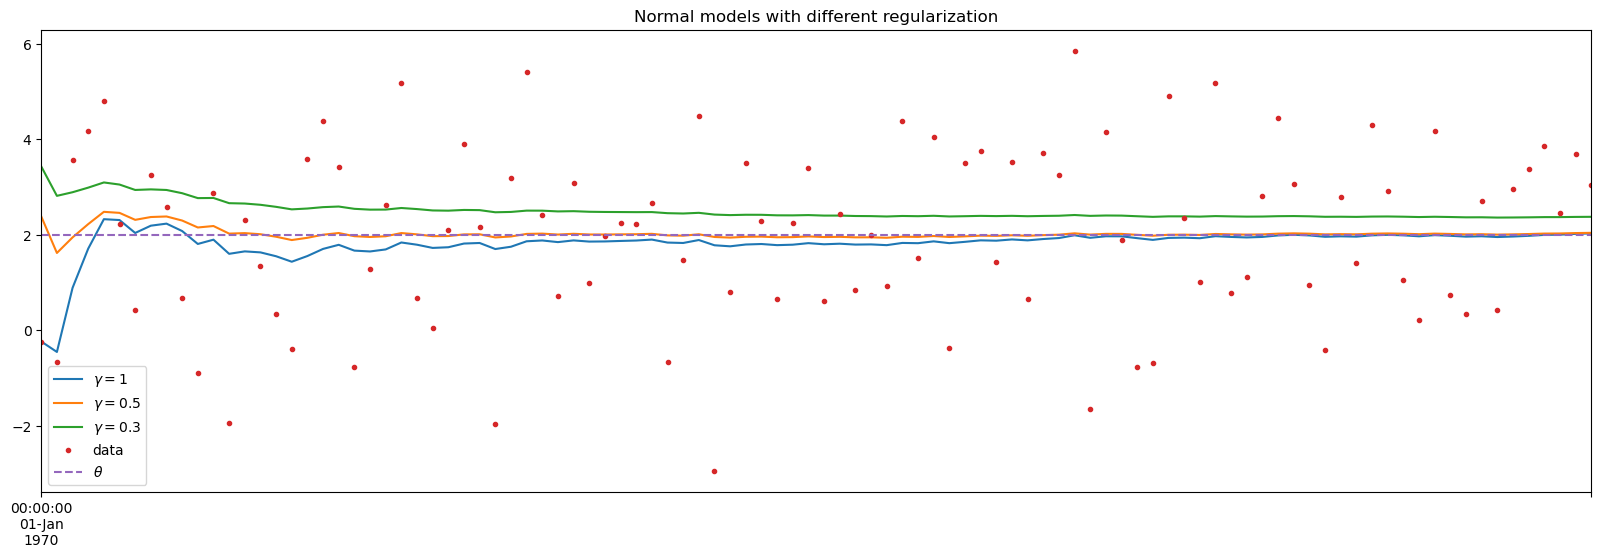

In [8]:
fig=  plt.figure(figsize=(20, 6))

model_a.to_frame()['mu'].plot(axes=fig.gca(), label="$\\gamma=1$")
model_b.to_frame()['mu'].plot(axes=fig.gca(), label="$\\gamma=0.5$")
model_c.to_frame()['mu'].plot(axes=fig.gca(), label="$\\gamma=0.3$")
plt.title("Normal models with different regularization")

plt.plot(data, marker='.', linestyle='None', label="data")
plt.plot([2]*len(data), linestyle='--', label="$\\theta$")
plt.legend()

In [9]:
from traced.models.poisson_model import PoissonModel

In [10]:
import scipy
import scipy.stats

In [11]:
data = scipy.stats.poisson.rvs(5, loc=0, size=100)

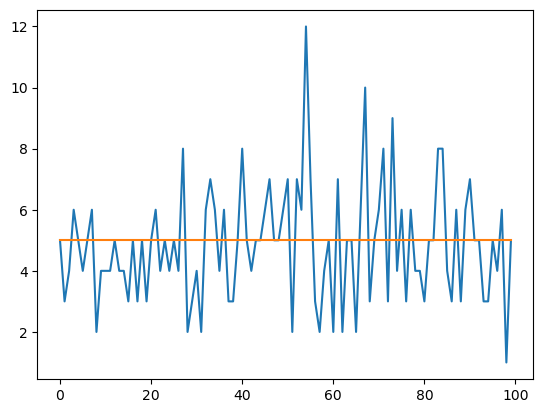

In [12]:
plt.plot(data)
plt.plot([5]*len(data))

In [13]:
model_a = PoissonModel("a", "b", alpha_0=20)
model_b = PoissonModel("a", "b", alpha_0=20, gamma=0.5)
model_c = PoissonModel("a", "b", alpha_0=20, gamma=0.3)

In [14]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

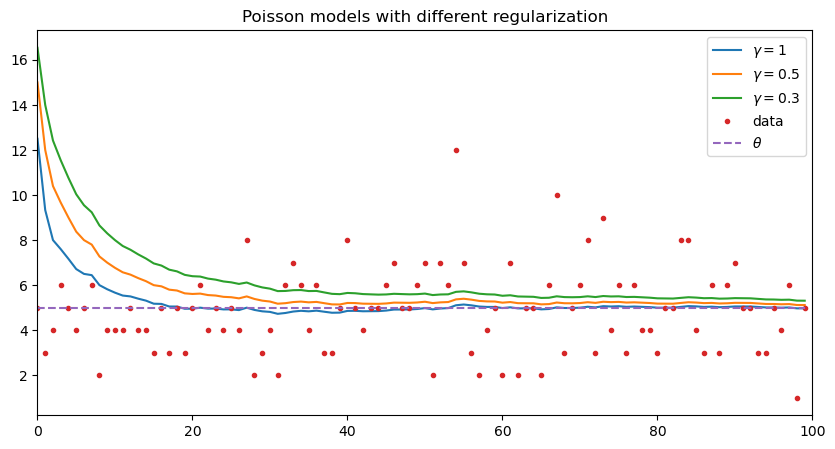

In [15]:
fig=  plt.figure(figsize=(10, 5))

model_a.to_frame().reset_index()['lambda'].plot(axes=fig.gca(), label="$\\gamma=1$")
model_b.to_frame().reset_index()['lambda'].plot(axes=fig.gca(), label="$\\gamma=0.5$")
model_c.to_frame().reset_index()['lambda'].plot(axes=fig.gca(), label="$\\gamma=0.3$")

plt.plot(data, marker='.', linestyle='None', label="data")
plt.plot([5]*len(data), linestyle='--', label="$\\theta$")
plt.xlim(0, len(data))
plt.legend()
plt.title("Poisson models with different regularization")
plt.show()

In [16]:
from traced.models.bernoulli_model import BernoulliModel

In [17]:
data = scipy.stats.bernoulli.rvs(0.75, size=100)

In [18]:
model_a = BernoulliModel("a", "b", gamma=1)
model_b = BernoulliModel("a", "b", gamma=0.995)
model_c = BernoulliModel("a", "b", gamma=0.99)

In [19]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

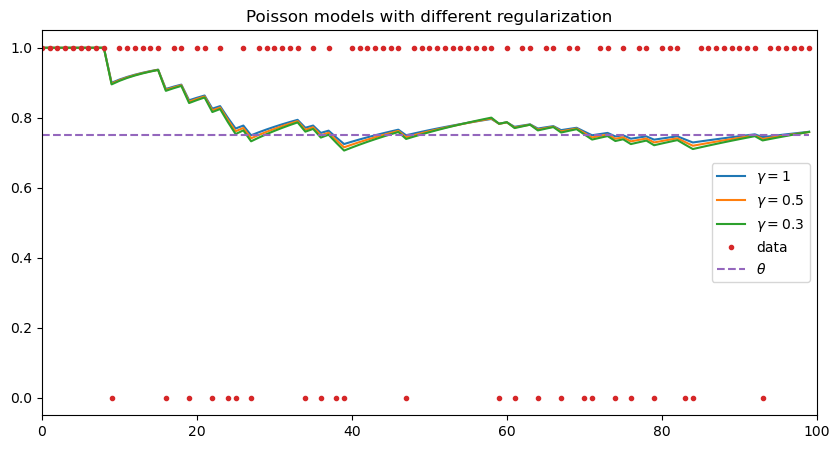

In [20]:
fig = plt.figure(figsize=(10, 5))

model_a.to_frame().reset_index()['success_prob'].plot(axes=fig.gca(), label="$\\gamma=1$")
model_b.to_frame().reset_index()['success_prob'].plot(axes=fig.gca(), label="$\\gamma=0.5$")
model_c.to_frame().reset_index()['success_prob'].plot(axes=fig.gca(), label="$\\gamma=0.3$")

plt.plot(data, marker='.', linestyle='None', label="data")
plt.plot([0.75]*len(data), linestyle='--', label="$\\theta $")
plt.xlim(0, len(data))
plt.legend()

plt.title("Poisson models with different regularization")
plt.show()

In [21]:
from traced.models import MultinomialModel

In [100]:
data = np.argmax(scipy.stats.multinomial.rvs(p=[.1, .2, .3, .4], n=1, size=100), axis=1)

In [101]:
data

array([3, 3, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3,
       3, 0, 0, 3, 2, 1, 2, 2, 1, 1, 3, 1, 3, 2, 3, 0, 2, 1, 2, 3, 1, 2,
       0, 2, 1, 3, 3, 3, 1, 2, 3, 2, 2, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       0, 1, 2, 1, 2, 3, 1, 0, 1, 3, 0, 3, 2, 1, 0, 2, 2, 3, 2, 2, 2, 3,
       1, 3, 3, 2, 0, 2, 3, 3, 0, 1, 2, 3])

In [102]:
model_a = MultinomialModel("a", "b", gamma=1)
model_b = MultinomialModel("a", "b", gamma=0.75)
model_c = MultinomialModel("a", "b", gamma=0.5)

In [103]:
for i, x in enumerate(data):
    model_a.log(i, x)
    model_b.log(i, x)
    model_c.log(i, x)

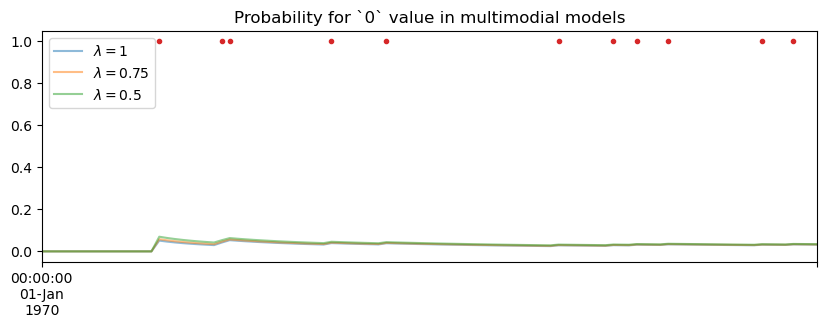

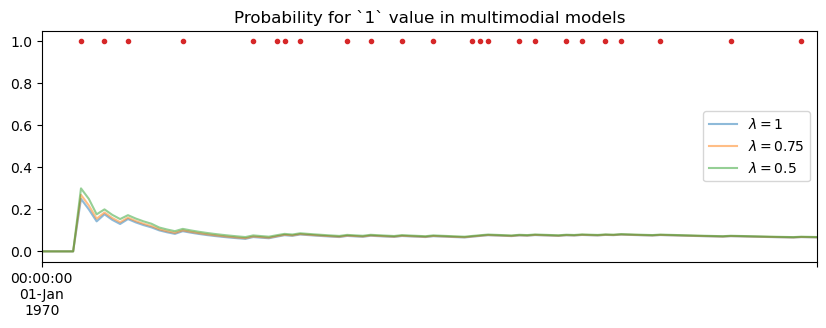

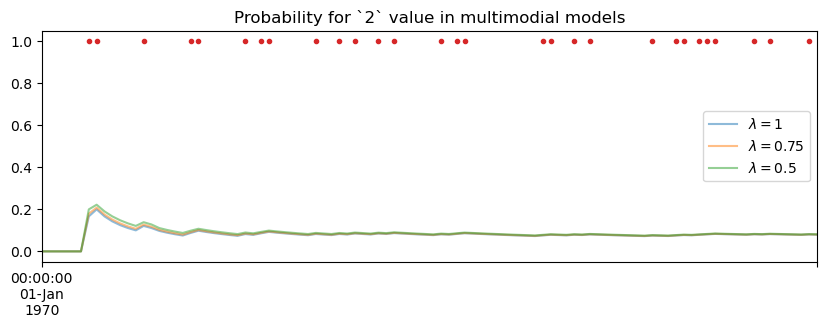

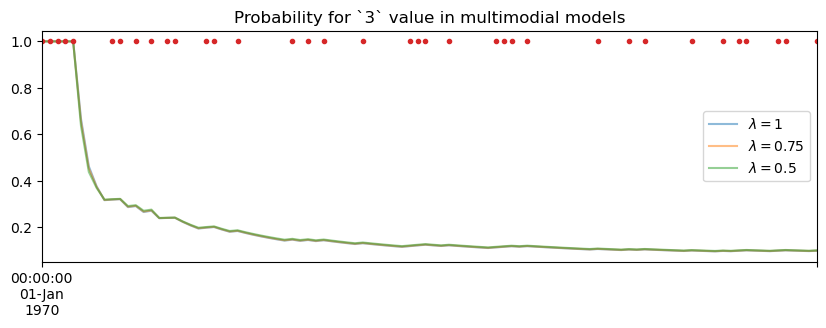

In [104]:
for i,col in enumerate(['p_0', 'p_1', 'p_2', 'p_3']):
    fig = plt.figure(figsize=(10, 3))
    ax = fig.gca()
    plt.title(f"Probability for `{i}` value in multimodial models")
    model_a.to_frame()[col].plot(ax=ax, label="$\\lambda=1$", alpha=0.5)
    model_b.to_frame()[col].plot(ax=ax, label="$\\lambda=0.75$", alpha=0.5)
    model_c.to_frame()[col].plot(ax=ax, label="$\\lambda=0.5$", alpha=0.5)
    idx = np.where(data==i)[0]
    plt.plot(idx, [1]*len(idx), marker='.', linestyle='None')
    plt.legend()
    plt.show()